<a href="https://colab.research.google.com/github/shatadru99/Change-Detection-and-Semantic-Segmentation/blob/master/Diversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive

/content/drive/My Drive


In [0]:
from skimage import io
import skimage
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import shutil

In [0]:
!unzip ISPRS_semantic_labeling_Vaihingen.zip

Archive:  ISPRS_semantic_labeling_Vaihingen.zip
   creating: dsm/
  inflating: dsm/dsm_09cm_matching_area33.tif  
  inflating: dsm/dsm_09cm_matching_area32.tif  
  inflating: dsm/dsm_09cm_matching_area29.tif  
  inflating: dsm/dsm_09cm_matching_area17.tif  
  inflating: dsm/dsm_09cm_matching_area2.tif  
  inflating: dsm/dsm_09cm_matching_area28.tif  
  inflating: dsm/dsm_09cm_matching_area6.tif  
  inflating: dsm/dsm_09cm_matching_area3.tif  
  inflating: dsm/dsm_09cm_matching_area21.tif  
  inflating: dsm/dsm_09cm_matching_area22.tif  
  inflating: dsm/dsm_09cm_matching_area7.tif  
  inflating: dsm/dsm_09cm_matching_area13.tif  
  inflating: dsm/dsm_09cm_matching_area16.tif  
  inflating: dsm/dsm_09cm_matching_area37.tif  
  inflating: dsm/dsm_09cm_matching_area35.tif  
  inflating: dsm/dsm_09cm_matching_area4.tif  
  inflating: dsm/dsm_09cm_matching_area5.tif  
  inflating: dsm/dsm_09cm_matching_area34.tif  
  inflating: dsm/dsm_09cm_matching_area20.tif  
  inflating: dsm/dsm_09cm_ma

In [0]:
print(len(os.listdir('gts_for_participants')))

16


In [0]:
print(len(os.listdir('top')))

33


In [0]:
print(len(os.listdir('gts_numpy')))

FileNotFoundError: ignored

In [0]:
ids=[]
for t_im in os.listdir('gts_for_participants'):
  ids.append(t_im.split('area')[1].split('.')[0])
print(len(ids))

16


In [0]:
ids

['17',
 '15',
 '7',
 '5',
 '32',
 '37',
 '3',
 '13',
 '21',
 '11',
 '23',
 '26',
 '34',
 '30',
 '1',
 '28']

In [0]:
list_for_top=[]
for id in ids[:12]:
  for t_im in os.listdir('top'):
    print(id)
    if(int(id) == int(t_im.split('area')[1].split('.')[0])):
      list_for_top.append(t_im)
      print(t_im)
      break

17
17
top_mosaic_09cm_area17.tif
15
15
15
top_mosaic_09cm_area15.tif
7
7
7
7
7
7
7
top_mosaic_09cm_area7.tif
5
5
5
5
5
5
5
5
5
top_mosaic_09cm_area5.tif
32
32
32
32
32
32
32
32
32
32
32
32
top_mosaic_09cm_area32.tif
37
37
37
37
37
37
37
37
37
37
37
37
37
top_mosaic_09cm_area37.tif
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
top_mosaic_09cm_area3.tif
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
top_mosaic_09cm_area13.tif
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
top_mosaic_09cm_area21.tif
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
top_mosaic_09cm_area11.tif
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
top_mosaic_09cm_area23.tif
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
top_mosaic_09cm_area26.tif


In [0]:
for i in list_for_top:
  print(i)
print(len(list_for_top))

top_mosaic_09cm_area17.tif
top_mosaic_09cm_area15.tif
top_mosaic_09cm_area7.tif
top_mosaic_09cm_area5.tif
top_mosaic_09cm_area32.tif
top_mosaic_09cm_area37.tif
top_mosaic_09cm_area3.tif
top_mosaic_09cm_area13.tif
top_mosaic_09cm_area21.tif
top_mosaic_09cm_area11.tif
top_mosaic_09cm_area23.tif
top_mosaic_09cm_area26.tif
12


In [0]:
for x in range(len(list_for_top)):
  list_for_top[x]=str('top/'+list_for_top[x])
for i in range(len(list_for_top)):
  print(list_for_top[i])

top/top_mosaic_09cm_area17.tif
top/top_mosaic_09cm_area15.tif
top/top_mosaic_09cm_area7.tif
top/top_mosaic_09cm_area5.tif
top/top_mosaic_09cm_area32.tif
top/top_mosaic_09cm_area37.tif
top/top_mosaic_09cm_area3.tif
top/top_mosaic_09cm_area13.tif
top/top_mosaic_09cm_area21.tif
top/top_mosaic_09cm_area11.tif
top/top_mosaic_09cm_area23.tif
top/top_mosaic_09cm_area26.tif


In [0]:
cd ISPRS/Vaihingen

/content/drive/My Drive/ISPRS/Vaihingen


In [0]:
os.mkdir('top')

In [0]:
!rm -r top 

In [0]:
cd ..

/content/drive/My Drive


In [0]:
c=0
for path in tqdm(os.listdir('top')):
  t_path='top/'+path
  new_path=shutil.copy(t_path,'ISPRS/Vaihingen/top')
  print(new_path)
  c=c+1
print(c)

  3%|▎         | 1/33 [00:00<00:03,  9.53it/s]

ISPRS/Vaihingen/top
ISPRS/Vaihingen/top


  9%|▉         | 3/33 [00:00<00:02, 10.29it/s]

ISPRS/Vaihingen/top


 15%|█▌        | 5/33 [00:00<00:02, 10.55it/s]

ISPRS/Vaihingen/top
ISPRS/Vaihingen/top
ISPRS/Vaihingen/top


 18%|█▊        | 6/33 [00:00<00:02,  9.98it/s]

ISPRS/Vaihingen/top


 24%|██▍       | 8/33 [00:00<00:02,  9.88it/s]

ISPRS/Vaihingen/top


 27%|██▋       | 9/33 [00:00<00:02,  9.67it/s]

ISPRS/Vaihingen/top


 30%|███       | 10/33 [00:00<00:02,  9.59it/s]

ISPRS/Vaihingen/top


 33%|███▎      | 11/33 [00:01<00:02,  8.89it/s]

ISPRS/Vaihingen/top


 36%|███▋      | 12/33 [00:01<00:02,  8.55it/s]

ISPRS/Vaihingen/top


 42%|████▏     | 14/33 [00:01<00:02,  9.30it/s]

ISPRS/Vaihingen/top
ISPRS/Vaihingen/top
ISPRS/Vaihingen/top


 48%|████▊     | 16/33 [00:01<00:01,  9.53it/s]

ISPRS/Vaihingen/top
ISPRS/Vaihingen/top


 55%|█████▍    | 18/33 [00:01<00:01,  9.45it/s]

ISPRS/Vaihingen/top
ISPRS/Vaihingen/top


 64%|██████▎   | 21/33 [00:02<00:01,  6.24it/s]

ISPRS/Vaihingen/top
ISPRS/Vaihingen/top


 70%|██████▉   | 23/33 [00:02<00:01,  7.08it/s]

ISPRS/Vaihingen/top
ISPRS/Vaihingen/top
ISPRS/Vaihingen/top

 76%|███████▌  | 25/33 [00:02<00:00,  8.15it/s]


ISPRS/Vaihingen/top


 85%|████████▍ | 28/33 [00:03<00:00,  7.84it/s]

ISPRS/Vaihingen/top
ISPRS/Vaihingen/top
ISPRS/Vaihingen/top


 91%|█████████ | 30/33 [00:03<00:00,  8.45it/s]

ISPRS/Vaihingen/top
ISPRS/Vaihingen/top


100%|██████████| 33/33 [00:03<00:00,  9.27it/s]

ISPRS/Vaihingen/top
ISPRS/Vaihingen/top
ISPRS/Vaihingen/top
33


  0%|          | 0/33 [00:00<?, ?it/s]

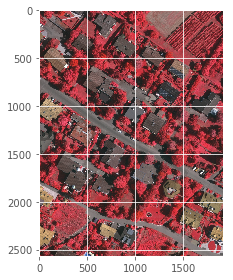

  3%|▎         | 1/33 [00:00<00:23,  1.33it/s]

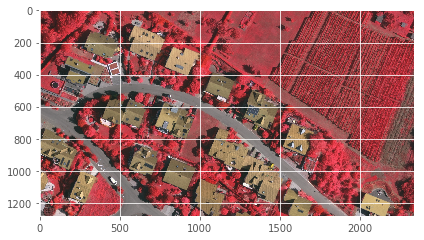

  6%|▌         | 2/33 [00:01<00:22,  1.38it/s]

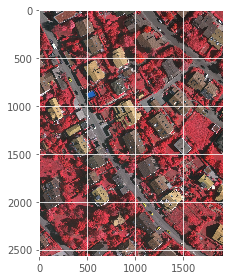

  9%|▉         | 3/33 [00:02<00:22,  1.36it/s]

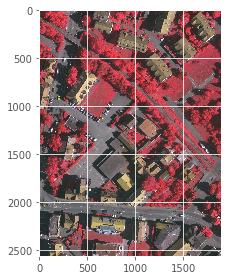

 12%|█▏        | 4/33 [00:02<00:21,  1.34it/s]

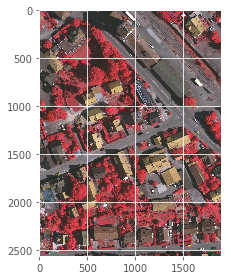

 15%|█▌        | 5/33 [00:03<00:20,  1.34it/s]

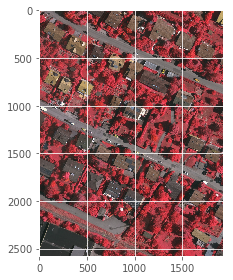

 18%|█▊        | 6/33 [00:04<00:20,  1.32it/s]

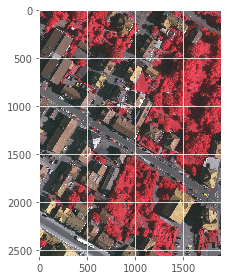

 21%|██        | 7/33 [00:05<00:20,  1.25it/s]

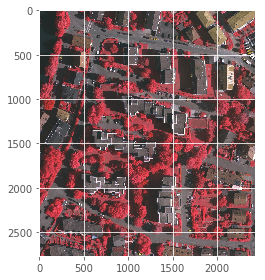

 24%|██▍       | 8/33 [00:06<00:21,  1.17it/s]

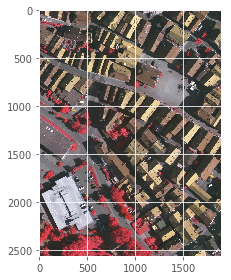

 27%|██▋       | 9/33 [00:07<00:19,  1.22it/s]

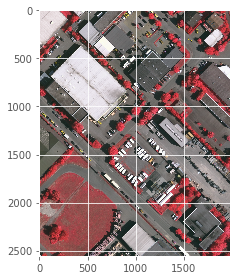

 30%|███       | 10/33 [00:07<00:18,  1.24it/s]

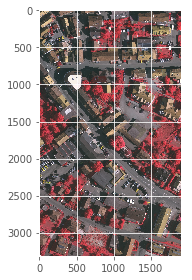

 33%|███▎      | 11/33 [00:08<00:18,  1.20it/s]

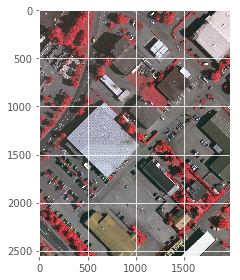

 36%|███▋      | 12/33 [00:09<00:16,  1.24it/s]

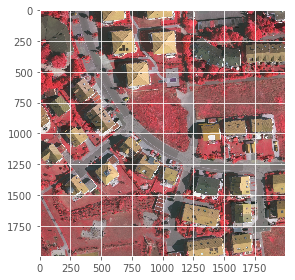

 39%|███▉      | 13/33 [00:10<00:15,  1.26it/s]

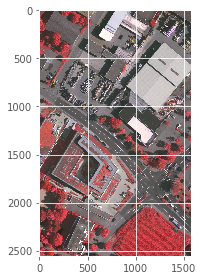

 42%|████▏     | 14/33 [00:10<00:14,  1.33it/s]

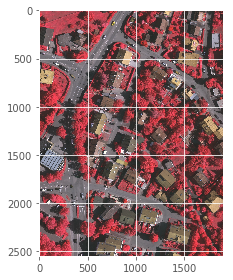

 45%|████▌     | 15/33 [00:11<00:13,  1.33it/s]

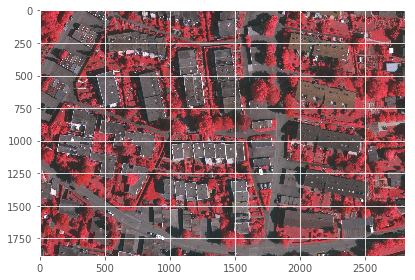

 48%|████▊     | 16/33 [00:12<00:13,  1.26it/s]

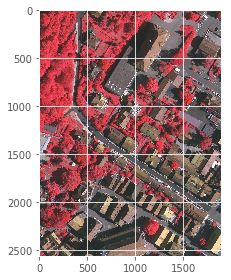

 52%|█████▏    | 17/33 [00:13<00:12,  1.29it/s]

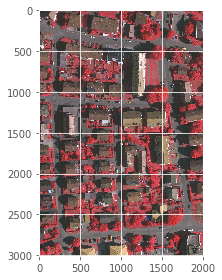

 55%|█████▍    | 18/33 [00:14<00:12,  1.24it/s]

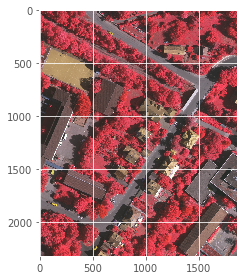

 58%|█████▊    | 19/33 [00:14<00:10,  1.29it/s]

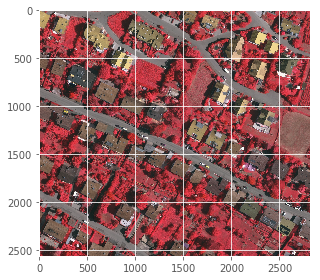

 61%|██████    | 20/33 [00:15<00:11,  1.16it/s]

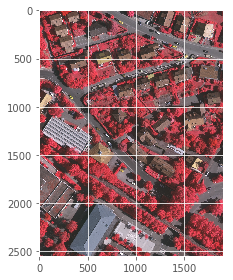

 64%|██████▎   | 21/33 [00:16<00:09,  1.21it/s]

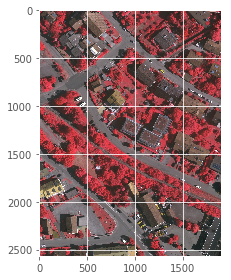

 67%|██████▋   | 22/33 [00:17<00:08,  1.23it/s]

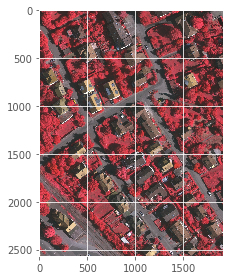

 70%|██████▉   | 23/33 [00:18<00:07,  1.25it/s]

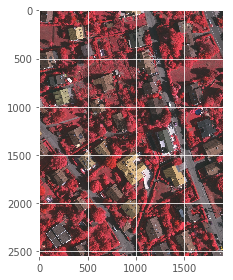

 73%|███████▎  | 24/33 [00:18<00:07,  1.28it/s]

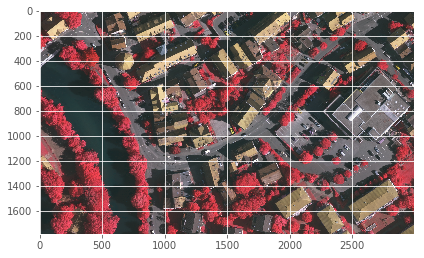

 76%|███████▌  | 25/33 [00:19<00:06,  1.23it/s]

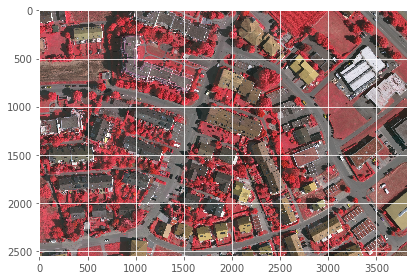

 79%|███████▉  | 26/33 [00:21<00:06,  1.03it/s]

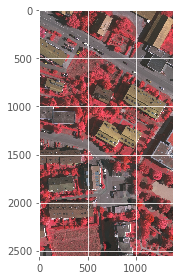

 82%|████████▏ | 27/33 [00:21<00:05,  1.15it/s]

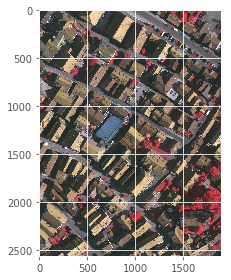

 85%|████████▍ | 28/33 [00:22<00:04,  1.19it/s]

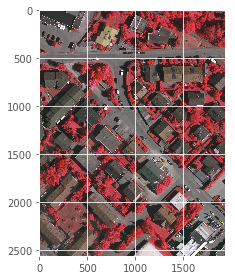

 88%|████████▊ | 29/33 [00:23<00:03,  1.22it/s]

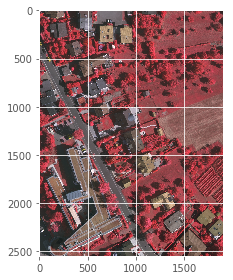

 91%|█████████ | 30/33 [00:24<00:02,  1.26it/s]

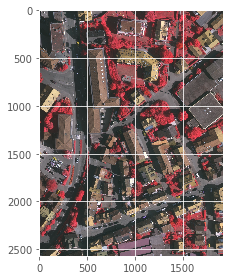

 94%|█████████▍| 31/33 [00:24<00:01,  1.28it/s]

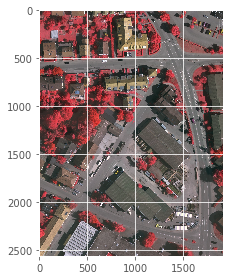

 97%|█████████▋| 32/33 [00:25<00:00,  1.30it/s]

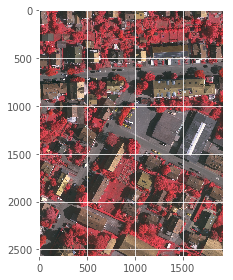

100%|██████████| 33/33 [00:26<00:00,  1.33it/s]


In [0]:
for path in tqdm(os.listdir('top')):
  io.imshow(io.imread('top'+'/'+path))
  plt.show()

In [0]:
cd ISPRS/Vaihingen

/content/drive/My Drive/ISPRS/Vaihingen


In [0]:
os.mkdir('gts_for_participants')

FileExistsError: ignored

In [0]:
cd ..

/content/drive/My Drive


In [0]:
c=0
for path in tqdm(os.listdir('gts_for_participants')):
  t_path='gts_for_participants/'+path
  new_path=shutil.copy(t_path,'ISPRS/Vaihingen/gts_for_participants')
  print(new_path)
  c=c+1
print(c)

 12%|█▎        | 2/16 [00:00<00:01, 13.10it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area17.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area15.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area7.tif


 25%|██▌       | 4/16 [00:00<00:01, 11.98it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area5.tif


 31%|███▏      | 5/16 [00:00<00:01, 10.81it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area32.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area37.tif


 50%|█████     | 8/16 [00:00<00:00,  8.67it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area3.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area13.tif


 62%|██████▎   | 10/16 [00:01<00:00,  9.01it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area21.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area11.tif


 75%|███████▌  | 12/16 [00:01<00:00,  8.84it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area23.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area26.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area34.tif


 94%|█████████▍| 15/16 [00:01<00:00,  9.31it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area30.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area1.tif


100%|██████████| 16/16 [00:01<00:00,  9.42it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area28.tif
16


  0%|          | 0/16 [00:00<?, ?it/s]

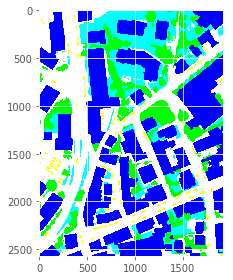

  6%|▋         | 1/16 [00:00<00:10,  1.43it/s]

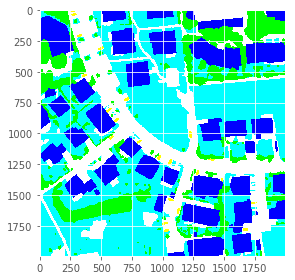

 12%|█▎        | 2/16 [00:01<00:09,  1.46it/s]

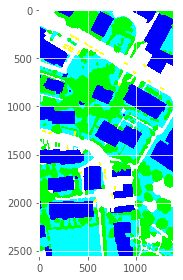

 19%|█▉        | 3/16 [00:01<00:08,  1.55it/s]

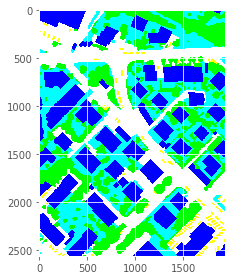

 25%|██▌       | 4/16 [00:02<00:07,  1.51it/s]

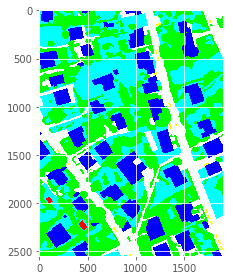

 31%|███▏      | 5/16 [00:03<00:07,  1.49it/s]

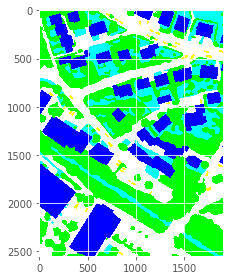

 38%|███▊      | 6/16 [00:04<00:06,  1.47it/s]

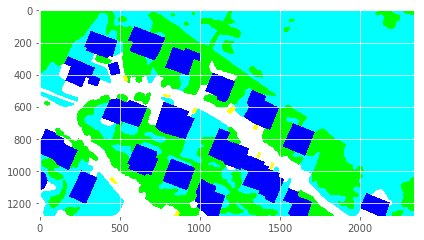

 44%|████▍     | 7/16 [00:04<00:05,  1.56it/s]

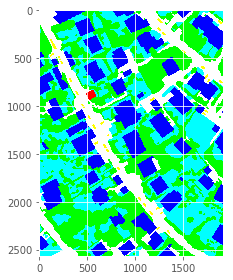

 50%|█████     | 8/16 [00:05<00:05,  1.52it/s]

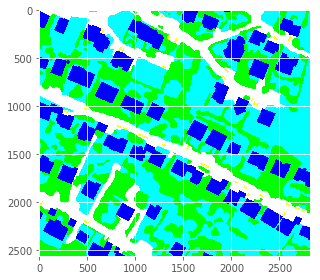

 56%|█████▋    | 9/16 [00:06<00:05,  1.31it/s]

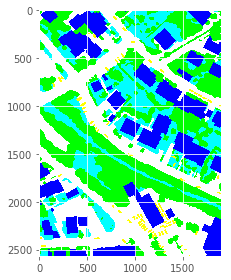

 62%|██████▎   | 10/16 [00:06<00:04,  1.36it/s]

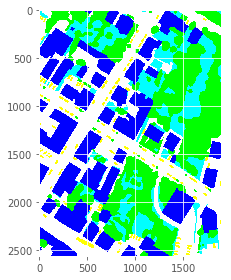

 69%|██████▉   | 11/16 [00:07<00:03,  1.29it/s]

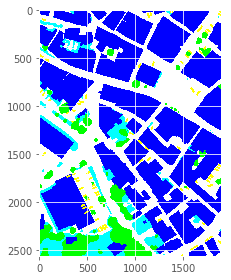

 75%|███████▌  | 12/16 [00:08<00:02,  1.33it/s]

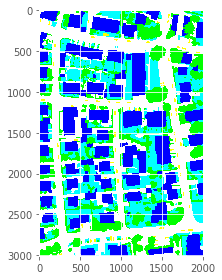

 81%|████████▏ | 13/16 [00:09<00:02,  1.27it/s]

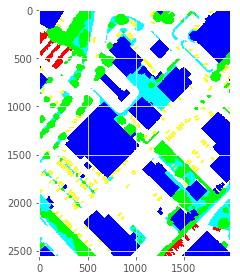

 88%|████████▊ | 14/16 [00:10<00:01,  1.31it/s]

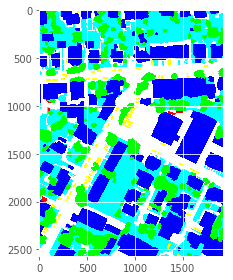

 94%|█████████▍| 15/16 [00:10<00:00,  1.34it/s]

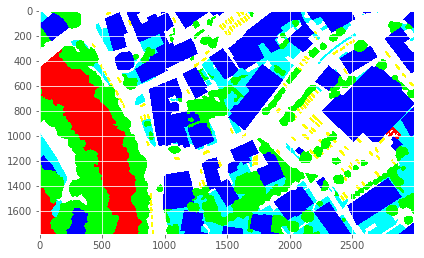

100%|██████████| 16/16 [00:11<00:00,  1.31it/s]


In [0]:
for path in tqdm(os.listdir('ISPRS/Vaihingen/gts_for_participants')):
  io.imshow(io.imread('ISPRS/Vaihingen/gts_for_participants'+'/'+path))
  plt.show()

In [0]:
label_values = ['imp_surfaces', 'building', 'low_vegetation',
                'tree', 'car', 'clutter']
# Color palette
palette = {0: (255, 255, 255),  # Impervious surfaces (white)
           1: (0, 0, 255),      # Buildings (dark blue)
           2: (0, 255, 255),    # Low vegetation (light blue)
           3: (0, 255, 0),      # Tree (green)
           4: (255, 255, 0),    # Car (yellow)
           5: (255, 0, 0),      # Clutter (red)
           6: (0, 0, 0)}        # Unclassified (black)
invert_palette = {(255, 255, 255): 0,  # Impervious surfaces (white)
                  (0, 0, 255): 1,      # Buildings (dark blue)
                  (0, 255, 255): 2,    # Low vegetation (light blue)
                  (0, 255, 0): 3,      # Tree (green)
                  (255, 255, 0): 4,    # Car (yellow)
                  (255, 0, 0): 5,      # Clutter (red)
                  (0, 0, 0): 6}        # Unclassified (black)
NUMBER_OF_CLASSES = len(label_values)

In [0]:
def convert_to_color(arr_2d, palette=palette):
    """ grayscale labels to RGB-color encoding """
    arr_3d = np.zeros((arr_2d.shape[0], arr_2d.shape[1], 3), dtype=np.uint8)

    for c, i in palette.items():
        m = arr_2d == c
        arr_3d[m] = i

    return arr_3d


def convert_from_color(arr_3d, palette=invert_palette):
    """ RGB-color encoding to grayscale labels """
    arr_2d = np.zeros((arr_3d.shape[0], arr_3d.shape[1]), dtype=np.uint8)

    for c, i in palette.items():
        m = np.all(arr_3d == np.array(c).reshape(1, 1, 3), axis=2)
        arr_2d[m] = i

    return arr_2d

In [0]:
l=[]
for f in tqdm(os.listdir('ISPRS/Vaihingen/gts_for_participants')):
    f2='ISPRS/Vaihingen/gts_for_participants'+'/'+f
    filename = f2.split('/')[-1]
    print(filename,'\n',f2)
    img = io.imread(f2)
    new_img = convert_from_color(img)
    l.append(new_img)
    #io.imsave(OUTPUT_FOLDER + '/' + filename, new_img)

FileNotFoundError: ignored

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


16
AxesImage(10.8,27.8;410.4x245.4)


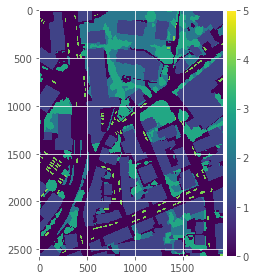

In [0]:
print(len(l))
print(io.imshow(l[0]))

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


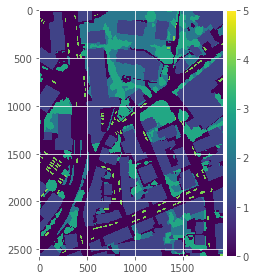

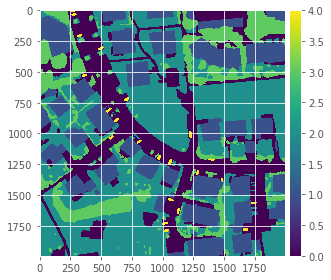

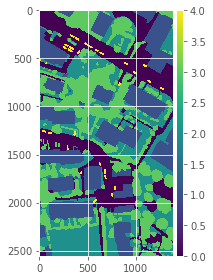

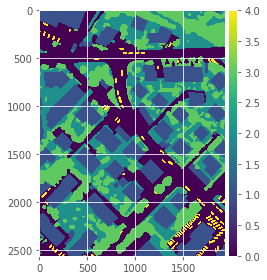

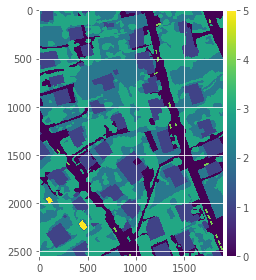

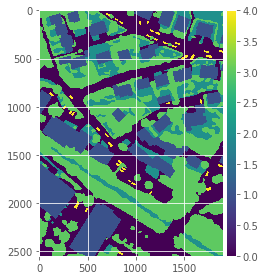

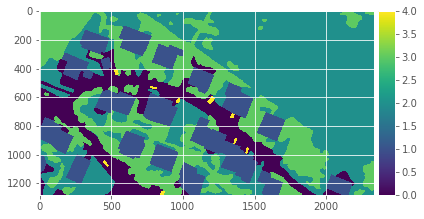

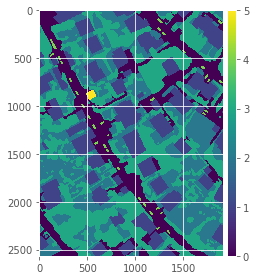

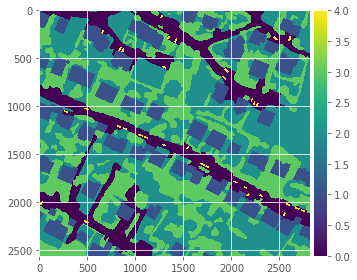

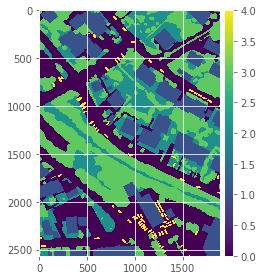

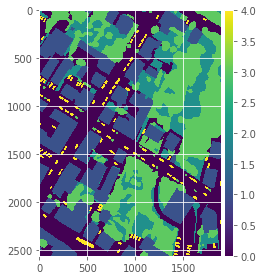

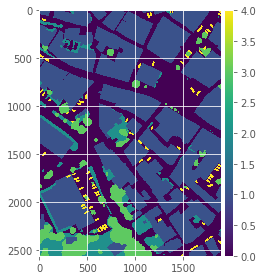

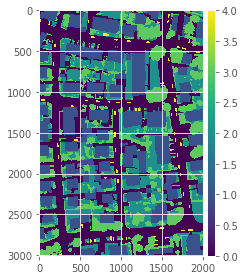

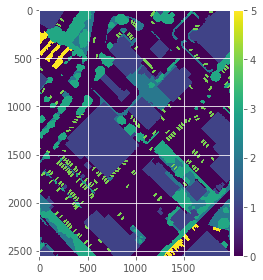

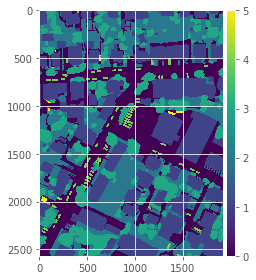

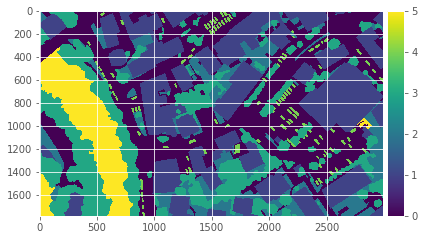

In [0]:
for i in range(len(l)):
  io.imshow(l[i])
  plt.show()

In [0]:
for i in range(len(l)):
  print(l[i].shape)

(2569, 1919)
(1995, 1996)
(2555, 1388)
(2563, 1934)
(2546, 1903)
(2546, 1903)
(1281, 2336)
(2565, 1919)
(2558, 2818)
(2566, 1893)
(2557, 1887)
(2557, 1887)
(3007, 2006)
(2555, 1980)
(2567, 1917)
(1783, 2995)


In [0]:
cd ISPRS/Vaihingen

/content/drive/My Drive/ISPRS/Vaihingen


In [0]:
os.mkdir('gts_numpy')

FileExistsError: ignored

In [0]:
OUTPUT_FOLDER='ISPRS/Vaihingen'+'/'+'gts_numpy'
OUTPUT_FOLDER

'ISPRS/Vaihingen/gts_numpy'

In [0]:
for f in tqdm(os.listdir('ISPRS/Vaihingen/gts_for_participants')):
    f2='ISPRS/Vaihingen/gts_for_participants'+'/'+f
    filename = f2.split('/')[-1]
    print(filename,'\n',f2)
    filename='.'.join([filename.split('.')[0],'png'])
    img = io.imread(f2)
    new_img = convert_from_color(img)
    io.imsave(OUTPUT_FOLDER + '/' + filename, new_img)

FileNotFoundError: ignored

In [0]:
s='top_mosaic_09cm_area1.tif'
print('.'.join([s.split('.')[0],'png']))

In [0]:
os.getcwd()

In [0]:
cd ..

In [0]:
for path in tqdm(os.listdir('ISPRS/Vaihingen/gts_numpy')):
  io.imshow(io.imread('ISPRS/Vaihingen/gts_numpy'+'/'+path))
  plt.show()

In [0]:
!rm -r for_training

In [0]:
!rm -r gts_numpy

In [0]:
!rm -r gts_for_participants

In [0]:
!rm -r top

In [0]:
!rm -r training_label

In [0]:
l=[]
for files in tqdm(os.listdir('My Drive')):
  print(files)

In [0]:
cd ..

In [0]:
cd My Drive

In [0]:
patch_size = (320, 320)
step_size = 320
ROTATIONS = [90,180,270]
FLIPS = [True,True]

In [0]:
BASE_DIR = 'ISPRS/'
DATASET = 'Vaihingen'
FOLDER_SUFFIX = '_fold1'
BASE_FOLDER = BASE_DIR + DATASET + '/'
BGR = True

In [0]:
os.path.isdir(BASE_FOLDER)

In [0]:
folders = [
    ('labels', BASE_FOLDER + 'gts_numpy/', 'top_mosaic_09cm_area{}.png'),
    ('irrg', BASE_FOLDER + 'top/', 'top_mosaic_09cm_area{}.tif')
]
train_ids = [(1,), (3,), (5,), (7,), (11,), (13,), (15,),
             (17,),(21,), (23,), (26,), (28,), (30,)]
test_ids = [(32,), (34,), (37,)]

In [0]:
DATASET_DIR = BASE_FOLDER + DATASET.lower() + '_{}_{}_{}'.format(
                                    patch_size[0], patch_size[1], step_size)
DATASET_DIR += '/'
DATASET_DIR

In [0]:
os.mkdir(DATASET_DIR)

In [0]:
os.path.isdir(DATASET_DIR)

In [0]:
import numpy as np
from skimage import io
import skimage.transform
import os
from tqdm import tqdm

import warnings
# Filter the warnings for low contrast images
warnings.filterwarnings('ignore')

In [0]:
def sliding_window(image, stride=320, window_size=(320,320)):
    """Extract patches according to a sliding window.
    Args:
        image (numpy array): The image to be processed.
        stride (int, optional): The sliding window stride (defaults to 10px).
        window_size(int, int, optional): The patch size (defaults to (20,20)).
    Returns:
        list: list of patches with window_size dimensions
    """
    patches = []
    # slide a window across the image
    for x in range(0, image.shape[0], stride):
        for y in range(0, image.shape[1], stride):
            new_patch = image[x:x + window_size[0], y:y + window_size[1]]
            if new_patch.shape[:2] == window_size:
                patches.append(new_patch)
    return patches


In [0]:
l1=[]
l2=[]
for suffix, folder, files in tqdm(folders):
    tqdm.write(("=== PROCESSING {} ===").format(suffix.upper()))

    # We create the subfolders splitted in train and test
    #os.mkdir(DATASET_DIR + suffix + '_train')
    #os.mkdir(DATASET_DIR + suffix + '_test')
    
    for id_ in train_ids:
      s=folder + files.format(*id_)
      print(folder + files.format(*id_))
      l1.append(s)

    # Generate generators to read the iamges
    train_dataset = (io.imread(folder + files.format(*id_)) for id_ in train_ids)
    test_dataset = (io.imread(folder + files.format(*id_)) for id_ in test_ids)


In [0]:
train_dataset.__next__()

In [0]:
patches=sliding_window(io.imread('ISPRS/Vaihingen/top/top_mosaic_09cm_area17.tif'))

In [0]:
patches[0].shape

In [0]:
len(patches)

In [0]:
s=io.imread('ISPRS/Vaihingen/top/top_mosaic_09cm_area17.tif')
io.imshow(io.imread('ISPRS/Vaihingen/top/top_mosaic_09cm_area17.tif'))
plt.show()
print(s.shape)
for im in tqdm(patches):
  io.imshow(im)
  plt.show()
  print(im.shape)

In [0]:
os.getcwd()

In [0]:
c=0
patches=[]
for image in train_dataset:
  print('here')
  patches.append(sliding_window(image))
  c=c+1

In [0]:
c=0
patches=[]
for image in train_dataset:
  if(c==0):
    io.imshow(image)
    plt.imshow()
    c=c+1

In [0]:
patches

In [0]:
def transform(patch, flip=True, mirror=True, rotations=[90,180,270]):
    """Perform data augmentation on a patch.
    Args:
        patch (numpy array): The patch to be processed.
        flip (bool, optional): Up/down symetry.
        mirror (bool, optional): left/right symetry.
        rotations (int list, optional) : rotations to perform (angles in deg).
    Returns:
        array list: list of augmented patches
    """
    transformed_patches = {'patch':patch}
    transformed_patches['rotations']={}
    for angle in rotations:
        transformed_patches['rotations'][angle]=(skimage.img_as_ubyte(skimage.transform.rotate(patch, angle)))
    if flip:
        transformed_patches['flip']=np.flipud(patch)
    if mirror:
        transformed_patches['mirror']=np.fliplr(patch)
    return transformed_patches

In [0]:
t_p=transform(patches[0])

In [0]:
len(t_p['rotations'])

In [0]:
len(t_p)

In [0]:
io.imshow(patches[0])
plt.show()
io.imshow(t_p['patch'])
plt.show()

In [0]:
io.imshow(patches[0])
plt.show()
io.imshow(t_p['flip'])
plt.show()

In [0]:
io.imshow(patches[0])
plt.show()
io.imshow(t_p['mirror'])
plt.show()

In [0]:
io.imshow(patches[0])
plt.show()
for key,im in t_p['rotations'].items():
  print(key)
  io.imshow(t_p['rotations'][key])
  plt.show()

In [0]:
def transform(patch, flip=False, mirror=False, rotations=[]):
    """Perform data augmentation on a patch.
    Args:
        patch (numpy array): The patch to be processed.
        flip (bool, optional): Up/down symetry.
        mirror (bool, optional): left/right symetry.
        rotations (int list, optional) : rotations to perform (angles in deg).
    Returns:
        array list: list of augmented patches
    """
    transformed_patches = [patch]
    for angle in rotations:
        transformed_patches.append(skimage.img_as_ubyte(skimage.transform.rotate(patch, angle)))
    if flip:
        transformed_patches.append(np.flipud(patch))
    if mirror:
        transformed_patches.append(np.fliplr(patch))
    return transformed_patches

In [0]:
details_file = open(DATASET_DIR + 'details.txt', 'w')
details_file.write('Dataset : ' + DATASET + '\n')
details_file.write('Training tiles : {}\n'.format(train_ids))
details_file.write('Testing tiles : {}\n'.format(test_ids))
details_file.write('Sliding window patch size : ({},{})'.format(*patch_size))
details_file.write('Sliding window stride : {}'.format(step_size))
details_file.close()

In [0]:
for suffix, folder, files in tqdm(folders):
    tqdm.write(("=== PROCESSING {} ===").format(suffix.upper()))

    # We create the subfolders splitted in train and test
    os.mkdir(DATASET_DIR + suffix + '_train')
    os.mkdir(DATASET_DIR + suffix + '_test')

    # Generate generators to read the iamges
    train_dataset = (io.imread(folder + files.format(*id_)) for id_ in train_ids)
    test_dataset = (io.imread(folder + files.format(*id_)) for id_ in test_ids)

    train_samples = []
    test_samples = []
    for image in tqdm(train_dataset):
        # Use the sliding window to extract the patches
        for patches in sliding_window(image, window_size=patch_size, stride=step_size):
            # Append the augmented patches to the sequence
            train_samples.extend(transform(patches, flip=FLIPS[0], mirror=FLIPS[1], rotations=ROTATIONS))

    for image in tqdm(test_dataset):
        # Same as the previous loop, but without data augmentation (test dataset)
        # Sliding window with no overlap
        for patches in sliding_window(image, window_size=patch_size, stride=patch_size[0]):
            test_samples.extend(transform(patches))

    # We save the images on disk
    for i, sample in tqdm(enumerate(train_samples), total=len(train_samples), desc="Saving train samples"):
        io.imsave('{}/{}.png'.format(DATASET_DIR + suffix + '_train', i), sample)

    tqdm.write("({} training set: done)".format(suffix))

    for i, sample in tqdm(enumerate(test_samples), total=len(test_samples), desc="Saving test samples"):
        io.imsave('{}/{}.png'.format(DATASET_DIR + suffix + '_test', i), sample)
    tqdm.write("({} testing set: done)".format(suffix))


print ("All done ! The dataset has been saved in {}.".format(DATASET_DIR))

In [0]:
os.getcwd()

In [0]:
!rm -r face_rec-master

In [0]:
!rm -r 'Humanoid Walking Robo'

In [0]:
!rm -r OUTPUT

In [0]:
!rm -r dsm

In [0]:
for path in os.listdir('ISPRS/Vaihingen/vaihingen_320_320_320/')[1:]:
  print('ISPRS/Vaihingen/vaihingen_320_320_320/'+path,end=" ")
  print(len(os.listdir('ISPRS/Vaihingen/vaihingen_320_320_320/'+path)))

In [0]:
for path in tqdm(os.listdir('ISPRS/Vaihingen/vaihingen_320_320_320/labels_test')[:10]):
  io.imshow(io.imread('ISPRS/Vaihingen/vaihingen_320_320_320/labels_test'+'/'+path))
  plt.show()

In [0]:
for path in tqdm(os.listdir('ISPRS/Vaihingen/vaihingen_320_320_320/irrg_test')[:10]):
  io.imshow(io.imread('ISPRS/Vaihingen/vaihingen_320_320_320/irrg_test'+'/'+path))
  plt.show()

In [0]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

In [0]:
def unet(pretrained_weights = None,input_size = (320,320,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv9)
    #conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(3, 3, activation = 'softmax')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    model.summary()


In [0]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [0]:
im_width = 320
im_height = 320
border = 5

In [0]:
ids = next(os.walk("images"))[2] # list of names all images in the given path
print("No. of images = ", len(ids))

StopIteration: ignored

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


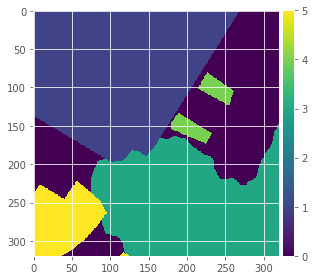

In [0]:
io.imshow(io.imread('ISPRS/Vaihingen/vaihingen_320_320_320/labels_test/0.png'))
plt.show()

In [0]:
tata = io.imread('ISPRS/Vaihingen/vaihingen_320_320_320/labels_test/0.png')
tata.shape

(320, 320)

(1, 320, 320, 1)


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


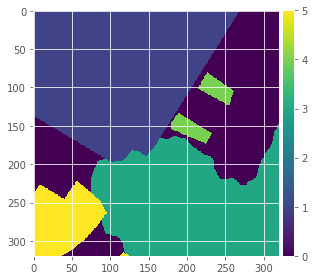

'x=(255-x)/255\nio.imshow(x)\nplt.show()'

In [0]:
x=io.imread('ISPRS/Vaihingen/vaihingen_320_320_320/labels_test/0.png')
y=x.reshape(1,x.shape[0],x.shape[1],1)
print(y.shape)
io.imshow(y[0,:,:,0])
plt.show()

"""x=(255-x)/255
io.imshow(x)
plt.show()"""

In [0]:
path = 'ISPRS/Vaihingen/vaihingen_320_320_320/labels_train/5.png'
from PIL import Image
img = Image.open(path).convert("RGB")
pixels = img.load()

In [0]:
imgg = load_img(path)
imgg.show()
print(imgg.format)

None


In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [0]:
x = load_img('ISPRS/Vaihingen/vaihingen_320_320_320/labels_train/15.png')
xy  = img_to_array(x)




In [0]:
%matplotlib inline
print(xy.shape)

(320, 320, 3)


In [0]:
np.nonzero(xy)

(array([  0,   0,   0, ..., 319, 319, 319]),
 array([  0,   0,   0, ..., 319, 319, 319]),
 array([0, 1, 2, ..., 0, 1, 2]))